In [ ]:
import os
import time
import math
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  
from sklearn.metrics import r2_score


In [ ]:
link = "wget --header=\"Host: doc-0s-00-docs.googleusercontent.com\" --header=\"User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36\" --header=\"Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9\" --header=\"Accept-Language: en-US,en;q=0.9,ar;q=0.8\" --header=\"Cookie: AUTH_6lee0osglmbi0u011ju8i3fe7157v0up_nonce=k7s4vk0m6a7to\" --header=\"Connection: keep-alive\" \"https://doc-0s-00-docs.googleusercontent.com/docs/securesc/3rp4rp7gjuledcqqglchp8l60ter2ccp/get3ljdh7f6vrsv947poei0791bifmjn/1670873175000/02942768578546061931/02942768578546061931/1pU6SXQTvK3yYG0DKfeZQ0c6N8QrSjJ6D?e=download&ax=AEKYgyT5Cq28kEZSCSx9hyDbwj6o2EEeb5AQHvYPh8r5hlkDgZKl8DLWUVYCNd9GisTtjcHB1Sils5DjYxCPxbnU4f5vI14_5GhKMDm_tBR4kEcPGMccpRPdE6N0VsxVmuh5Px8cNmxyxKwmaOWVPSUi-ogyIsgEcuTJbhN9x2nOrkMDA_mM3SFQMh9jtWLKjJAKGbvllxD9SVhHxAMUhm9twlyzFMO4uuSO5gYCRDAbpOlbleFk-cRXKWCWuL6t29YHvylfiq9xdhdDwR9_6OgHADD9yreNcOe7bRmqVb-5UsUI5Le6enL3MfBckrltfokiK5vy3LfYFi1TyVpI_aGPm6HsSm0FbCb-B3aMZrEaOF0gIMT3J6C0Fdq2kc3KobbkyhDX_0BRgdBAno_XJ-CUI6nvksdyUMGpaFNYJoFvISzPbcRvl-RjlmBlI0ECnNnIu7Bs0ZkvgXbY85SeS6gFrHMW0Reb3qQtSSSG2boKJV9dOcOsEFWhZImSHlVCbhdblmHcvmIdje3yJqsOT5qi0ufiqtE5gHV4YLodWmUoJreYrGqNSLEiUT5bMs47w7wg_MLVfDfsmeZaQkGpNVdv-yUVjNEPnRh66dvxTEFDkEWNIDuaC5OTcV6XtU7tLCd7ajmKS6zyDX9SVJ97prKQcUUOCYA2WN5SM2VDxaL3F6AIUxBCQBJOyEL_wfpki7HNdnw-jH6NcKssvHlaLNbTmyzLd_YFtw2Vcc54XLC3xv2Fm52rrt02QBWBDvVZlRW6Ope0XWSB0P1B3WlNpNLd5KHkPBa1rXtlpSdF2JCspCm03Kfc4HKVGzjB_Jv9Xa-9LqHVEnUOjQkCw9aOVO0rfCzDJc-AL_fpVDtpLune22omm3L9_Kurnm5O93Lo4ccE4t081Vh-ytsbNYjCS4gb_PhRZCgcQpCs2ug_rOX0FOkAl4S4wMRjNj-6FjLezxJuXgbsCS6p02kfkOdAAKWV9N17xStFWsmGGoAhVBy-Gw2YF9GJw3mAK6tDkbaYLx7u8VTsd0TyzIa4kB6ysA&uuid=2b277962-b115-4ca6-b057-d91939d8c3ca&authuser=0&nonce=k7s4vk0m6a7to&user=02942768578546061931&hash=764l8grsu1kda50rbje1v76hri10a8ec\" -c -O 'Shanghai AQI and Wheather 2014-2021.csv'" #@param {type:"string"}
path = "/content" #@param {type:"string"}
%cd "$path"
!$link --no-check-certificate

/content
--2022-12-14 02:41:10--  https://doc-0s-00-docs.googleusercontent.com/docs/securesc/3rp4rp7gjuledcqqglchp8l60ter2ccp/get3ljdh7f6vrsv947poei0791bifmjn/1670873175000/02942768578546061931/02942768578546061931/1pU6SXQTvK3yYG0DKfeZQ0c6N8QrSjJ6D?e=download&ax=AEKYgyT5Cq28kEZSCSx9hyDbwj6o2EEeb5AQHvYPh8r5hlkDgZKl8DLWUVYCNd9GisTtjcHB1Sils5DjYxCPxbnU4f5vI14_5GhKMDm_tBR4kEcPGMccpRPdE6N0VsxVmuh5Px8cNmxyxKwmaOWVPSUi-ogyIsgEcuTJbhN9x2nOrkMDA_mM3SFQMh9jtWLKjJAKGbvllxD9SVhHxAMUhm9twlyzFMO4uuSO5gYCRDAbpOlbleFk-cRXKWCWuL6t29YHvylfiq9xdhdDwR9_6OgHADD9yreNcOe7bRmqVb-5UsUI5Le6enL3MfBckrltfokiK5vy3LfYFi1TyVpI_aGPm6HsSm0FbCb-B3aMZrEaOF0gIMT3J6C0Fdq2kc3KobbkyhDX_0BRgdBAno_XJ-CUI6nvksdyUMGpaFNYJoFvISzPbcRvl-RjlmBlI0ECnNnIu7Bs0ZkvgXbY85SeS6gFrHMW0Reb3qQtSSSG2boKJV9dOcOsEFWhZImSHlVCbhdblmHcvmIdje3yJqsOT5qi0ufiqtE5gHV4YLodWmUoJreYrGqNSLEiUT5bMs47w7wg_MLVfDfsmeZaQkGpNVdv-yUVjNEPnRh66dvxTEFDkEWNIDuaC5OTcV6XtU7tLCd7ajmKS6zyDX9SVJ97prKQcUUOCYA2WN5SM2VDxaL3F6AIUxBCQBJOyEL_wfpki7HNdnw-jH6NcKssvHlaLNbTmyzLd_YFt

In [ ]:
os.rename("/content/Shanghai AQI and Wheather 2014-2021 (1).csv","Weather 2014-2021.csv")

          uvIndex  humidity
uvIndex   1.00000   0.08484
humidity  0.08484   1.00000
0.8766844911323672


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5.71201051])

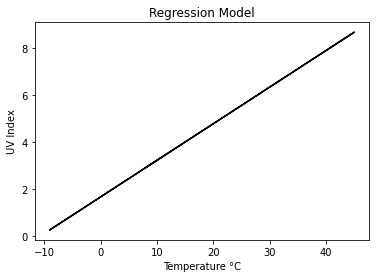

In [ ]:
df = pd.read_csv('/content/Weather 2014-2021.csv')
df['month'] = pd.DatetimeIndex(df['date']).month
#print(df['month'])
df = df[["FeelsLikeC","humidity","uvIndex","month"]]
df = df.dropna()
#df = df.sample(n=50)

df.describe()
#plt.scatter(df.uvIndex,df.FeelsLikeC,color='red')
#df.hist()
x = df[["FeelsLikeC"]]
y = df['uvIndex']

lin_reg=LinearRegression()
lin_reg.fit(x,y)
#predictedUV = lin_reg.predict([[16.3, 51]])
#print(predictedUV)
lin_reg.intercept_
lin_reg.coef_
dfth = df[['uvIndex','humidity']]
print(dfth.corr())
df.corr()
df.describe()
plt.plot(x, lin_reg.predict(x),color='k') 
plt.title("Regression Model")
plt.xlabel("Temperature °C")
plt.ylabel("UV Index")
y_pred = lin_reg.predict(x)
print(r2_score(y, y_pred))
lin_reg.coef_
lin_reg.intercept_
lin_reg.coef_
lin_reg.predict([[26]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('Weather 2014-2021.csv')

df['month'] = pd.DatetimeIndex(df['date']).month
'''
X = df[["month","humidity"]]
y = df["uvIndex"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)
plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()
'''
df.head()

,date,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,...,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,AQI,AQI_Explained,month
0,2014-01-01,15.0,5.0,0.0,8.7,4.0,0.0,-1.0,11.0,12.0,...,43.0,0.0,1021.0,15.0,10.0,242.0,12.0,319.0,Hazardous,1
1,2014-01-02,14.0,7.0,0.0,8.7,4.0,2.0,4.0,11.0,13.0,...,60.0,0.0,1019.0,14.0,10.0,141.0,14.0,352.0,Hazardous,1
2,2014-01-03,16.0,9.0,0.0,8.7,4.0,10.0,3.0,11.0,12.0,...,55.0,0.0,1017.0,16.0,10.0,295.0,14.0,338.0,Hazardous,1
3,2014-01-04,10.0,4.0,0.0,5.5,2.0,17.0,3.0,7.0,9.0,...,68.0,0.1,1022.0,10.0,10.0,169.0,14.0,355.0,Hazardous,1
4,2014-01-05,10.0,3.0,0.0,8.7,3.0,24.0,3.0,9.0,9.0,...,66.0,0.0,1024.0,10.0,10.0,117.0,6.0,343.0,Hazardous,1


KeyError: ignored

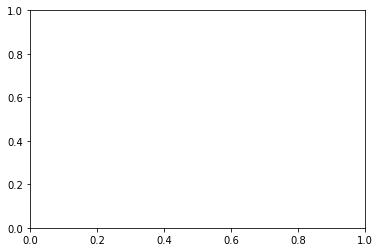

In [ ]:
#X = df.iloc[:, 8:9].values
#y = df["uvIndex"]
X = pd.DataFrame([2,3,4,5,6,7,8,9,10,11])
y = pd.DataFrame([83,57,42,35,29,25,22,20,18,17])
lin = LinearRegression()
lin.fit(X, y)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 50)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
#plt.scatter(X, y, color = 'blue')
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('uvIndex')
plt.show()
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()
lin2.predict(poly.fit_transform(X))
# Predicting a new result with Polynomial Regression after converting predict variable to 2D array
pred2 = 10
pred2array = np.array([[pred2]])
lin2.predict(poly.fit_transform(pred2array))

(10,)


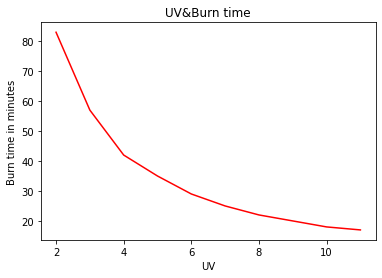

In [ ]:
U = np.array([2,3,4,5,6,7,8,9,10,11])
V = np.array([83,57,42,35,29,25,22,20,18,17])
print(U.shape)
plt.plot(U, V, color = 'red')
plt.title('UV&Burn time')
plt.xlabel('UV')
plt.ylabel('Burn time in minutes')
plt.show()

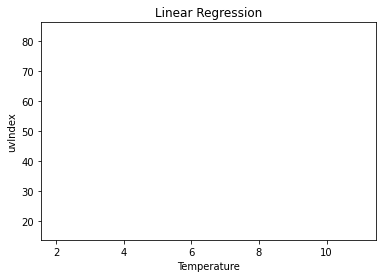

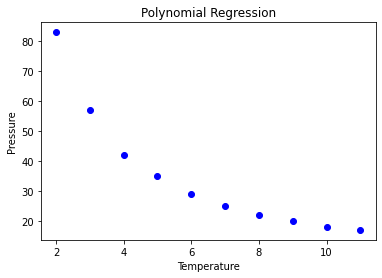

array([[83., 57., 42., 35., 29., 25., 22., 20., 18., 17.]])

In [ ]:
U = U.reshape(1, -1)
V = V.reshape(1, -1)
lin = LinearRegression()
lin.fit(U, V)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(U)
poly.fit(X_poly, V)
lin2 = LinearRegression()
lin2.fit(X_poly, V)
#plt.scatter(X, y, color = 'blue')
plt.plot(U, lin.predict(U), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Temperature')
plt.ylabel('uvIndex')
plt.show()
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(U)
  
poly.fit(X_poly, V)
lin2 = LinearRegression()
lin2.fit(X_poly, V)
# Visualising the Polynomial Regression results
plt.scatter(U, V, color = 'blue')
  
plt.plot(U, lin2.predict(poly.fit_transform(V)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.show()
lin2.predict(poly.fit_transform(U))